# <span style="color: skyblue;"> **Librerire, funzioni e descrizione dataframe**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import pycountry_convert as pc
from pathlib import Path

#### <span style="color: orange;"> **Descrizione dataframe**

<span style="color: orange;">***movies.csv: oltre 940.000 voci.***
- 'id' (id del film - chiave esterna per le altre relazioni)
- 'name' (titolo del film)
- 'date' (data di uscita)
- 'tagline' (lo slogan sul poster)
- 'description' (un breve riassunto della trama)
- 'minute' (durata in minuti)
- 'rating'
---
<span style="color: orange;">***countries.csv: oltre 693.000 voci***
- 'id' (id del film)
- 'country' (uno dei paesi di origine - può essercene più di uno per film)
---
<span style="color: orange;">***actors.csv: oltre 5,7 milioni di voci***
- 'id' (id del film)
- 'name' (nome dell'attore)
- 'role' (personaggio interpretato)
---
<span style="color: orange;">***crew.csv: oltre 4,7 milioni di voci.***
- 'id' (id del film)
- 'role' (ad es. regista)
- 'name' (nome della persona)

---
<span style="color: orange;">***posters.csv: oltre 940.000 voci:***
- 'id' (id del film)
- 'link' (link ai poster originali dei film)

---
<span style="color: orange;">***releases.csv: oltre 13 milioni di voci.***
- 'id' (id del film)
- 'country' (paese di uscita)
- 'date'
- 'type' (Cinematografico/Digitale…)
- 'rating' (valutazione ricevuta in questo paese, ad es. PG, ecc.)

---
Dati aggiuntivi (questi dati provengono da un set di dati diverso, quindi non includono l'id del film):

<span style="color: orange;">***The_oscar_awards.csv: oltre 10.000 voci sui candidati agli Oscar.***
- 'year_film' (l'anno in cui è uscito il film)
- 'year_ceremony' (l'anno della cerimonia)
- 'category' (ad es. attore)
- 'name' (nome della persona)
- 'film' (il titolo del film)
- 'winner' (se ha vinto o meno)

---
<span style="color: orange;">***rotten_tomatoes_reviews.csv: oltre 1,1 milioni di recensioni da Rotten Tomato:***
- 'rotten_tomatoes_link'
- 'movie_title',
- 'critic_name',
- 'top_critic',
- 'publisher_name',
- 'review_type',
- 'review_score',
- 'review_date',
- 'review_content'

# <span style="color: skyblue;"> **Settaggio parametri grafici**

In [155]:
palette = sns.color_palette("tab20", 20)

from utils import graphic_settings

graphic_settings(plt)

# <span style="color: skyblue;"> **Caricamento dataset**

I dataset vengono salvati in un dizionario. Le keys del dizionario corrispondono ai nomi dei file.

In [3]:
folder_df = Path("../../data")

In [4]:
df={}
for dataset in folder_df.iterdir():
    df[dataset.name.replace('.csv', '')] = pd.read_csv(dataset)

# <span style="color: skyblue;"> **Data cleaning**

## <span style="color: orange;"> *Standardizzazione dei Nomi delle Colonne*

Per garantire coerenza nell'analisi, vengono rinominate alcune colonne chiave.
Questo permette di avere nomi più descrittivi e coerenti tra i diversi dataset.

In [5]:
df['movies'] = df['movies'].rename(columns={'name' : 'movie_title', 'date' : 'movie_year', 'rating' : 'movie_rating'})
df["movies"].dtypes

id                int64
movie_title      object
movie_year      float64
tagline          object
description      object
minute          float64
movie_rating    float64
dtype: object

In [6]:
df['actors'] = df['actors'].rename(columns={'name' : 'actor_name'})
df['actors'].dtypes

id             int64
actor_name    object
role          object
dtype: object

In [54]:
df['the_oscar_awards'] = df['the_oscar_awards'].rename(columns={'name' : 'member_name', 'film' : 'movie_title', 'year_film': 'movie_year'})
df['the_oscar_awards'].dtypes

movie_year        int64
year_ceremony     int64
ceremony          int64
category         object
member_name      object
movie_title      object
winner             bool
is_duplicate       bool
dtype: object

In [8]:
df['releases'] = df['releases'].rename(columns={'country' : 'release_country', 'date' : 'release_date', 'type' : 'release_type', 'rating' : 'release_rating'})
df['releases'].dtypes

id                  int64
release_country    object
release_date       object
release_type       object
release_rating     object
dtype: object

In [9]:
df['crew'] = df['crew'].rename(columns={'name' : 'crew_name'})
df['crew'].dtypes

id            int64
role         object
crew_name    object
dtype: object

In [10]:
df['languages'] = df['languages'].rename(columns={'type' : 'language_type'})
df['languages'].dtypes

id                int64
language_type    object
language         object
dtype: object

## <span style="color: orange;"> *Identificazione dei duplicati*

Per ogni dataframe:
1. Normalizza i campi di testo (rimuove spazi e converte in minuscolo)
2. Identifica le righe duplicate e aggiunge una colonna booleana *is_duplicate*

Il dataset *movies* necessita di un approccio diverso:
   considera duplicati solo in base alla combinazione di titolo e anno.
   Questo risulta necessario in quanto, con una rapida esplorazione del dataset, si è visto che esistono film con lo stesso titolo ma rilasciati in anni differenti (ad esempio, per il film *Barbie* esiste una versione del 2023 e una versione del 2012, ma sono film differenti).

In [55]:
for k in [x for x in df.keys() if x != 'movies']:
    if 'is_duplicate' in df[k].columns:
        df[k].drop('is_duplicate', axis=1, inplace=True)

    tmp = df[k].apply(lambda x : x.str.strip().str.lower() if x.dtype == 'object' else x)
    duplicate = tmp.duplicated()
    # i True vengono trattati come 1
    print(k, duplicate.sum())
    df[k]['is_duplicate'] = duplicate

tmp = df['movies'].apply(lambda x : x.str.strip().str.lower() if x.dtype == 'object' else x)
duplicate = tmp.duplicated(subset=['movie_title','movie_year'])

df['movies']['is_duplicate'] = duplicate
print('movies',duplicate.sum())

actors 961
countries 0
crew 1288
genres 0
languages 0
posters 0
releases 0
rotten_tomatoes_reviews 119471
studios 230
themes 0
the_oscar_awards 7
movies 25811


Mostriamo tramite un bar chart la percentuale di duplicati trovati per ogni dataframe.

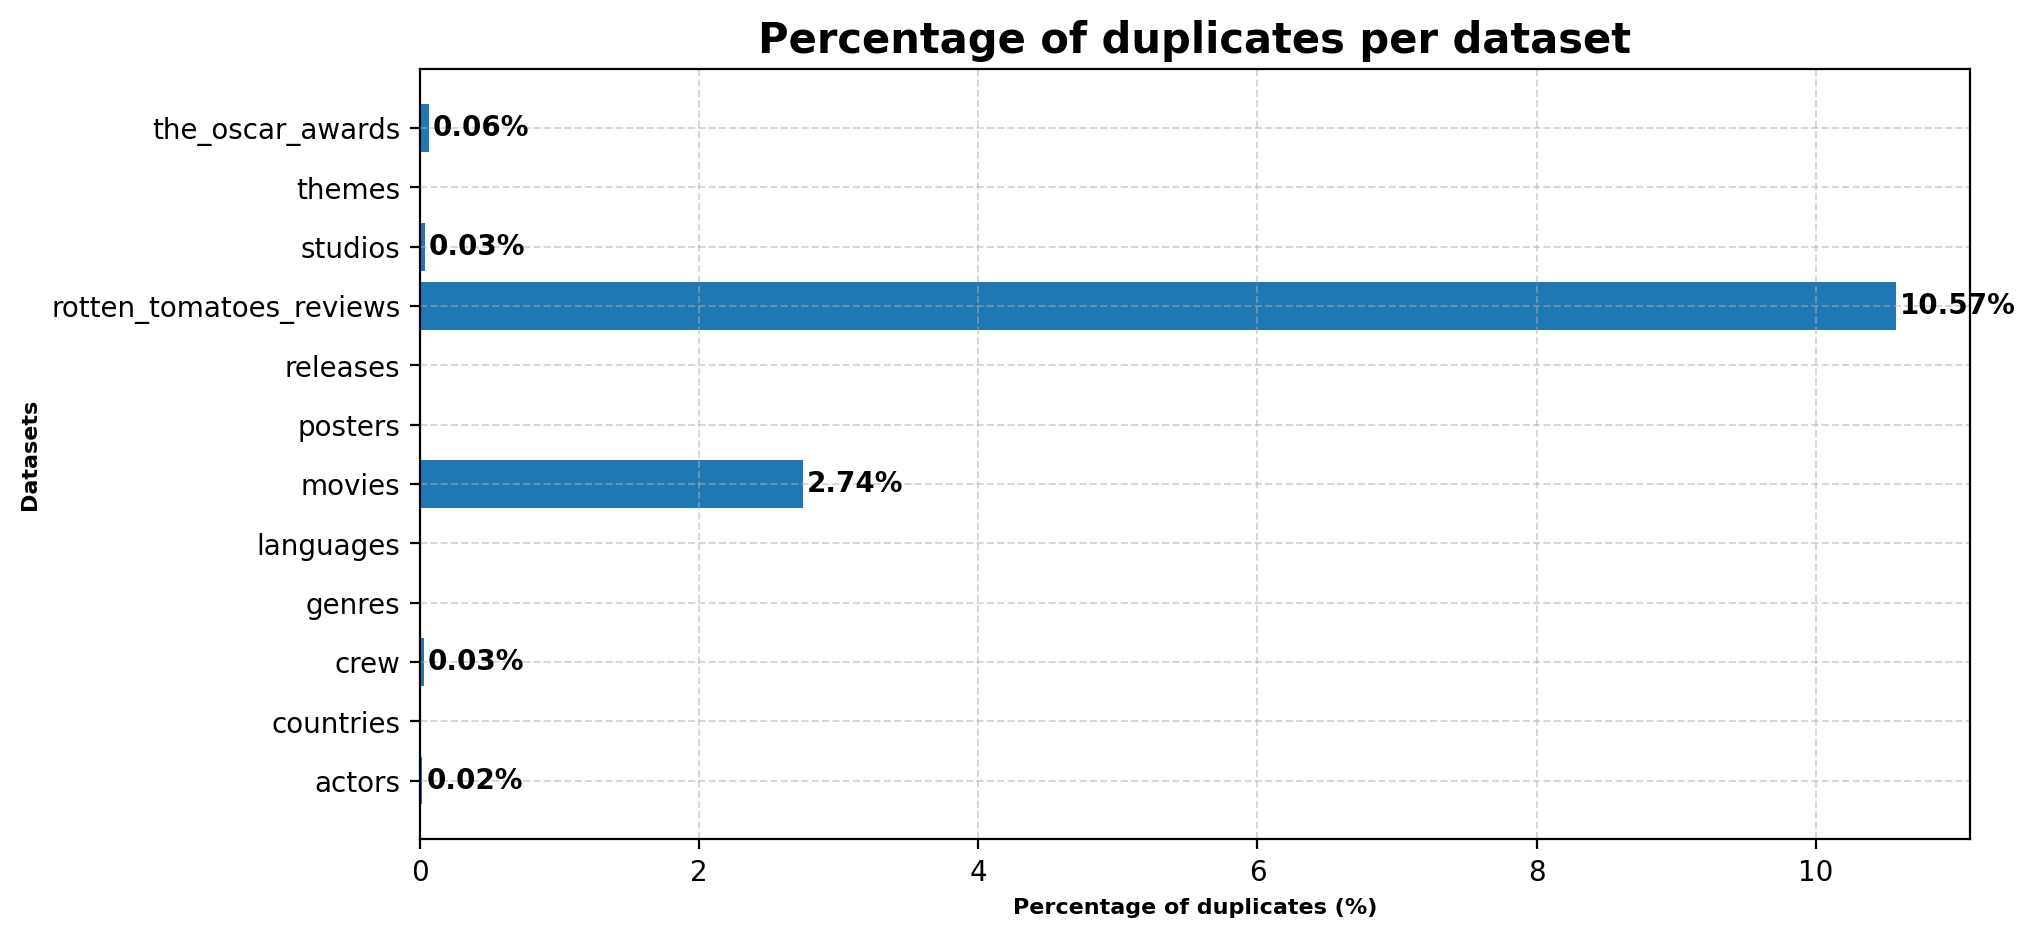

In [156]:
plt.figure(figsize=(10,5))
for k in df.keys():
    perc =  (len(df[k][df[k]['is_duplicate']==True]) / len(df[k]))*100
    plt.barh(k, perc, color=palette[0])
    if perc != 0:
        plt.text(perc +0.03 , k, f'{perc:.2f}%', va='center', ha='left', fontsize=10, fontweight='bold')
plt.title('Percentage of duplicates per dataset', fontweight='bold', fontsize=15)
plt.xlabel('Percentage of duplicates (%)')
plt.ylabel('Datasets')
plt.show()

Prima di rimuovere i duplicati, puliamo ulteriormente i df eliminando le entries contenenti stringhe di un formato non consono e, dove richiesto, convertiamo il formato delle date.La presenza significativa di duplicati (specialmente nelle recensioni di Rotten Tomatoes) suggerisce la necessità di una fase di pulizia dei dati prima di procedere con analisi più approfondite.

### <span style="color: orange;"> Standardizzazione dei Campi Testuali

Questa sezione implementa una pulizia approfondita dei campi testuali nel dataset *movies*. Le operazioni eseguite sono:

- Rimozione di caratteri Unicode invisibili (BOM e zero-width space)
- Eliminazione di newline, carriage return e tab
- Normalizzazione degli spazi multipli in spazio singolo
- Rimozione degli spazi bianchi iniziali e finali

In [58]:
text_columns = ["movie_title", "tagline", "description"]

for column in text_columns:
    df['movies'][column] = (
        df['movies'][column]
            .str.replace(r'[\uFEFF\u200B]', '', regex=True)
            .str.replace(r'[\n\r\t]', '', regex=True)
            .str.replace(r'\s+', ' ', regex=True)
            .str.strip()
    )

df['movies'].info()
df['movies'].head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941597 entries, 0 to 941596
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            941597 non-null  int64  
 1   movie_title   941587 non-null  object 
 2   movie_year    849684 non-null  float64
 3   tagline       139387 non-null  object 
 4   description   780785 non-null  object 
 5   minute        760027 non-null  float64
 6   movie_rating  90999 non-null   float64
 7   is_duplicate  941597 non-null  bool   
dtypes: bool(1), float64(3), int64(1), object(3)
memory usage: 51.2+ MB


,id,movie_title,movie_year,tagline,description,minute,movie_rating,is_duplicate
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,False
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,False
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30,False
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,False
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,False


Il dataset *releases* richiede anche la conversione della colonna *release_date* da stringa in formato datetime di pandas.
I vantaggi includono:
- Possibilità di effettuare calcoli temporali
- Facilitare il filtraggio e l'ordinamento per data

In [59]:
df['releases']['release_date'] = pd.to_datetime(df['releases']['release_date'], format="%Y-%m-%d")
df['releases'].head(5)

,id,release_country,release_date,release_type,release_rating,is_duplicate
0,1000001,Andorra,2023-07-21,Theatrical,NaN,False
1,1000001,Argentina,2023-07-20,Theatrical,ATP,False
2,1000001,Australia,2023-07-19,Theatrical,PG,False
3,1000001,Australia,2023-10-01,Digital,PG,False
4,1000001,Austria,2023-07-20,Theatrical,NaN,False


Possiamo ora procedere ad eliminare i duplicati, filtrando per tutti i valori di 'drop_duplicates' che sono False.

In [60]:
df_clean={}
for k,v in df.items():
    df_clean[k] = v[v['is_duplicate'] == False].drop('is_duplicate', axis=1)

## <span style="color: orange;"> *Armonizzazione degli Identificatori*

La normalizzazione delle chiavi primarie viene effettuata assumendo il dataset *movies* come riferimento principale.

Un'analisi preliminare evidenzia discrepanze tra gli identificatori presenti nei vari dataframe rispetto a quelli del dataset *movies*.

In [61]:
# controllo discrepanze
movies = df_clean['movies']
template_id = df_clean['movies']['id'].unique()

for k in df_clean.keys():
    if k == 'movies' or k == 'rotten_tomatoes_reviews' or k == 'the_oscar_awards':
        continue
    print(k)
    print(len(template_id)-len(df_clean[k]['id'].unique()))

actors
281484
countries
298594
crew
108724
genres
239295
languages
10208
posters
-25811
releases
89768
studios
477589
themes
891278


Come si può notare, per tutti abbiamo discrepanza.

Si procede ad uniformare la presenza degli ID come segue:
- si ottengono gli id univoci di movies;
- si generano nuovi dataframe soltanto con gli id presenti in movies facendo un left join con gli altri dataframe;
- non vengono considerati gli id non presenti in movies ma presenti negli altri dataset.

In [62]:
# assegnazione di un nuovo dizionario uniformato.
unique_id = len(movies['id'].unique())

df_finale= {}
for k in df_clean.keys():
    if k == 'movies' or k == 'rotten_tomatoes_reviews' or k == 'the_oscar_awards':
        df_finale[k] = df_clean[k]
        continue
    temp= pd.merge(movies, df_clean[k], on='id', how='left')[df_clean[k].columns]
    if len(temp['id'].unique()) != unique_id:
        print(f'PROBLEMI CON IL DATASET {k}')
        break
    df_finale[k] = temp

In [63]:
# test di validità
for k,v in df_finale.items():
    if 'id' in v.columns:
        print(k, '\n', len(v['id'].unique()) - len(df_finale['movies']['id'].unique()))

actors 
 0
countries 
 0
crew 
 0
genres 
 0
languages 
 0
movies 
 0
posters 
 0
releases 
 0
studios 
 0
themes 
 0


## <span style="color: orange;"> *Uniformare le valutazioni degli utenti sul dataset 'rotten_tomatoes_reviews'*

C'è bisogno di uniformare il campo 'review_score' degli iscritti per il dataset 'rotten_tomatoes_reviews'.
Per questo abbiamo bisogno di vedere quanta diversità di formato abbiamo e scegliere una scala comune.

Le dividiamo in 4 categorie:
- alfabetiche
- x/5
- x/10
- x/100

Per adesso convertiamo tutto in una scala che vada da 1 a 10.

Per questo utilizziamo la funzione 'converter'.


In [64]:
from utils import converter 

In [65]:
review_pre_convert= df_finale['rotten_tomatoes_reviews']['review_score']
df_finale['rotten_tomatoes_reviews']['review_score'] = df_finale['rotten_tomatoes_reviews']['review_score'].map(converter)

Quante reviews ci siamo persi facendo la conversione?

In [66]:
new_nan_records = (df_finale['rotten_tomatoes_reviews']['review_score'].isna() & ~review_pre_convert.isna()).sum()
print(f'Percentuale di reviews perse: {round(new_nan_records/len(review_pre_convert.isna())*100,2)}%')

Percentuale di reviews perse: 0.14%


AGGIUNGERE COMMENTO QUI

## <span style="color: skyblue;"> **Data Analysis**

### <span style="color: orange;">*Distribuzione del numero di film prodotti per anno*

In [67]:
df_finale['movies']

,id,movie_title,movie_year,tagline,description,minute,movie_rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09
...,...,...,...,...,...,...,...
941592,1941593,神笛,NaN,NaN,NaN,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaN,NaN,Shinjuku forest at night. In the sap taverns o...,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaN,NaN,"The city that never sleeps, where insects gath...",30.0,NaN
941595,1941596,重生,NaN,NaN,"In a world where order has broken down, darkne...",NaN,NaN


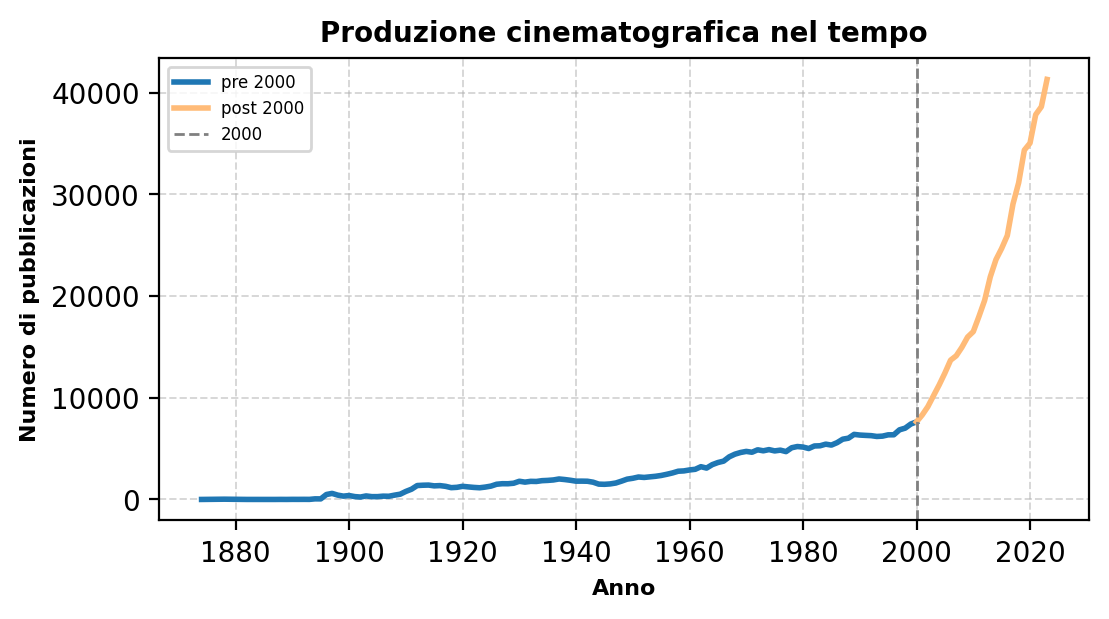

In [157]:
group_date = df_finale['movies'].groupby('movie_year')['id'].count()

group_date_1 = group_date[group_date.index <= 2000]
group_date_2 = group_date[(group_date.index >= 2000) & (group_date.index < 2024)]
plt.plot(group_date_1, color = palette[0], label='pre 2000')
plt.plot(group_date_2, color = palette[3], label='post 2000')
plt.axvline(x=2000, color='grey', linestyle='--', label='2000', alpha=1, linewidth=1)
plt.legend()
plt.title('Produzione cinematografica nel tempo')
plt.xlabel('Anno')
plt.ylabel('Numero di pubblicazioni')
plt.show()

Il grafico rivela un vertiginoso aumento della produzione dopo il 2000. Questo fenomeno rappresenta il risultato della rivoluzione digitale che ha trasformato radicalmente il settore cinematografico.

Tra i principali fattori che spiegano tale crescità c'è sicuramente una riduzione drastica dei costi delle apparecchiature digitali e la possibilità di girare film anche con doispositivi non professionali.

### <span style="color: orange;"> *Classificazione dei Film per Durata*

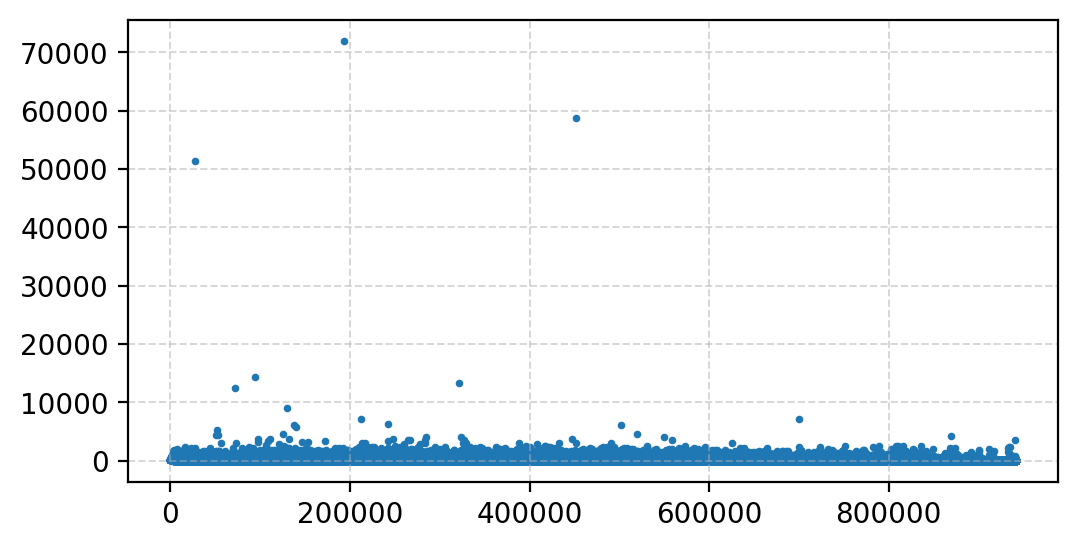

In [158]:
plt.scatter(df_finale['movies'].index, df_finale['movies']['minute'], s=3, color=palette[0])

Assicuriamoci che ci siano tutti dati numerici

In [70]:
df_finale['movies']['minute'].describe()

count    740385.000000
mean         66.425410
std         156.238954
min           1.000000
25%          15.000000
50%          63.000000
75%          92.000000
max       72000.000000
Name: minute, dtype: float64

#### <span style="color: orange;"> *Categorizzazione dei Film per Metraggio* 

Definiamo:
- **Cortometraggio**: film con una durata inferiore a 30 minuti (secondo l'Academy Awards) o 40 minuti (secondo il Festival di Cannes e altre istituzioni).
- **Mediometraggio**: film con una durata compresa tra 30/40 minuti e 60 minuti. È una categoria meno utilizzata rispetto alle altre due.
- **Lungometraggio**: film con una durata superiore a 60 minuti (spesso 70-90 minuti in su, per essere considerato standard nelle sale cinematografiche).
- **Altro**: i non film, spesso serie TV, tutti quei record che hanno un minutaggio maggiorre di 4 ore.


In [71]:
from utils import categorize_movie

df_finale['movies']['categoria'] = df_finale['movies'].apply(categorize_movie, axis=1)

Analizziamo la distribuzione per minutaggio

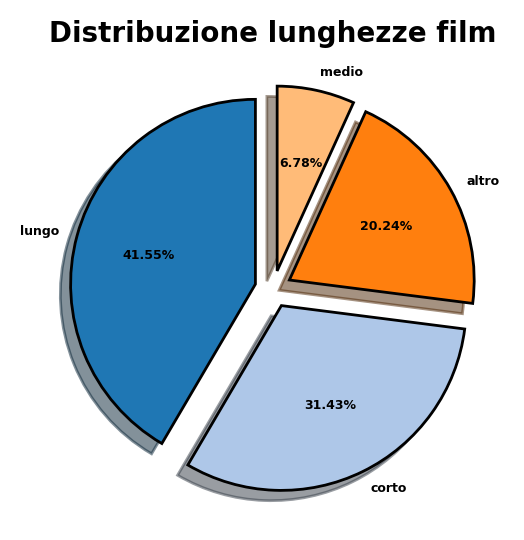

In [160]:
explode = (0.1, 0.1, 0.1, 0.1) 
plt.pie(perc,
        labels = perc.index,
        autopct = '%1.2f%%',
        startangle = 90, 
        colors = palette[:len(perc)], 
        wedgeprops = {'edgecolor': 'black'},
        textprops = {'fontsize': 4.5, 'fontweight': 'bold'},
        radius = 1,
        explode = explode,
        shadow = True)
plt.title('Distribuzione lunghezze film')

plt.show()

Un'analisi preliminare visiva suggerisce che i lungometraggi (44.55%) dominano il mercato, rappresentando il cinema tradizionale commerciale, mentre l'alta percentuale dei cortometraggi (31.43%) testimonia la vitalità della produzione sperimentale e indipendente.

È importante sottolineare che una significativa porzione della categoria *altro* nel nostro dataset corrisponde a contenuti televisivi seriali e non convenzionali.

Procedendo con un'analisi temporale comparativa tra le diverse categorie di contenuto, ci aspettiamo una crescita significativa della categoria *altro* a partire dagli anni '90 e 2000, con un trend monotono crescente.

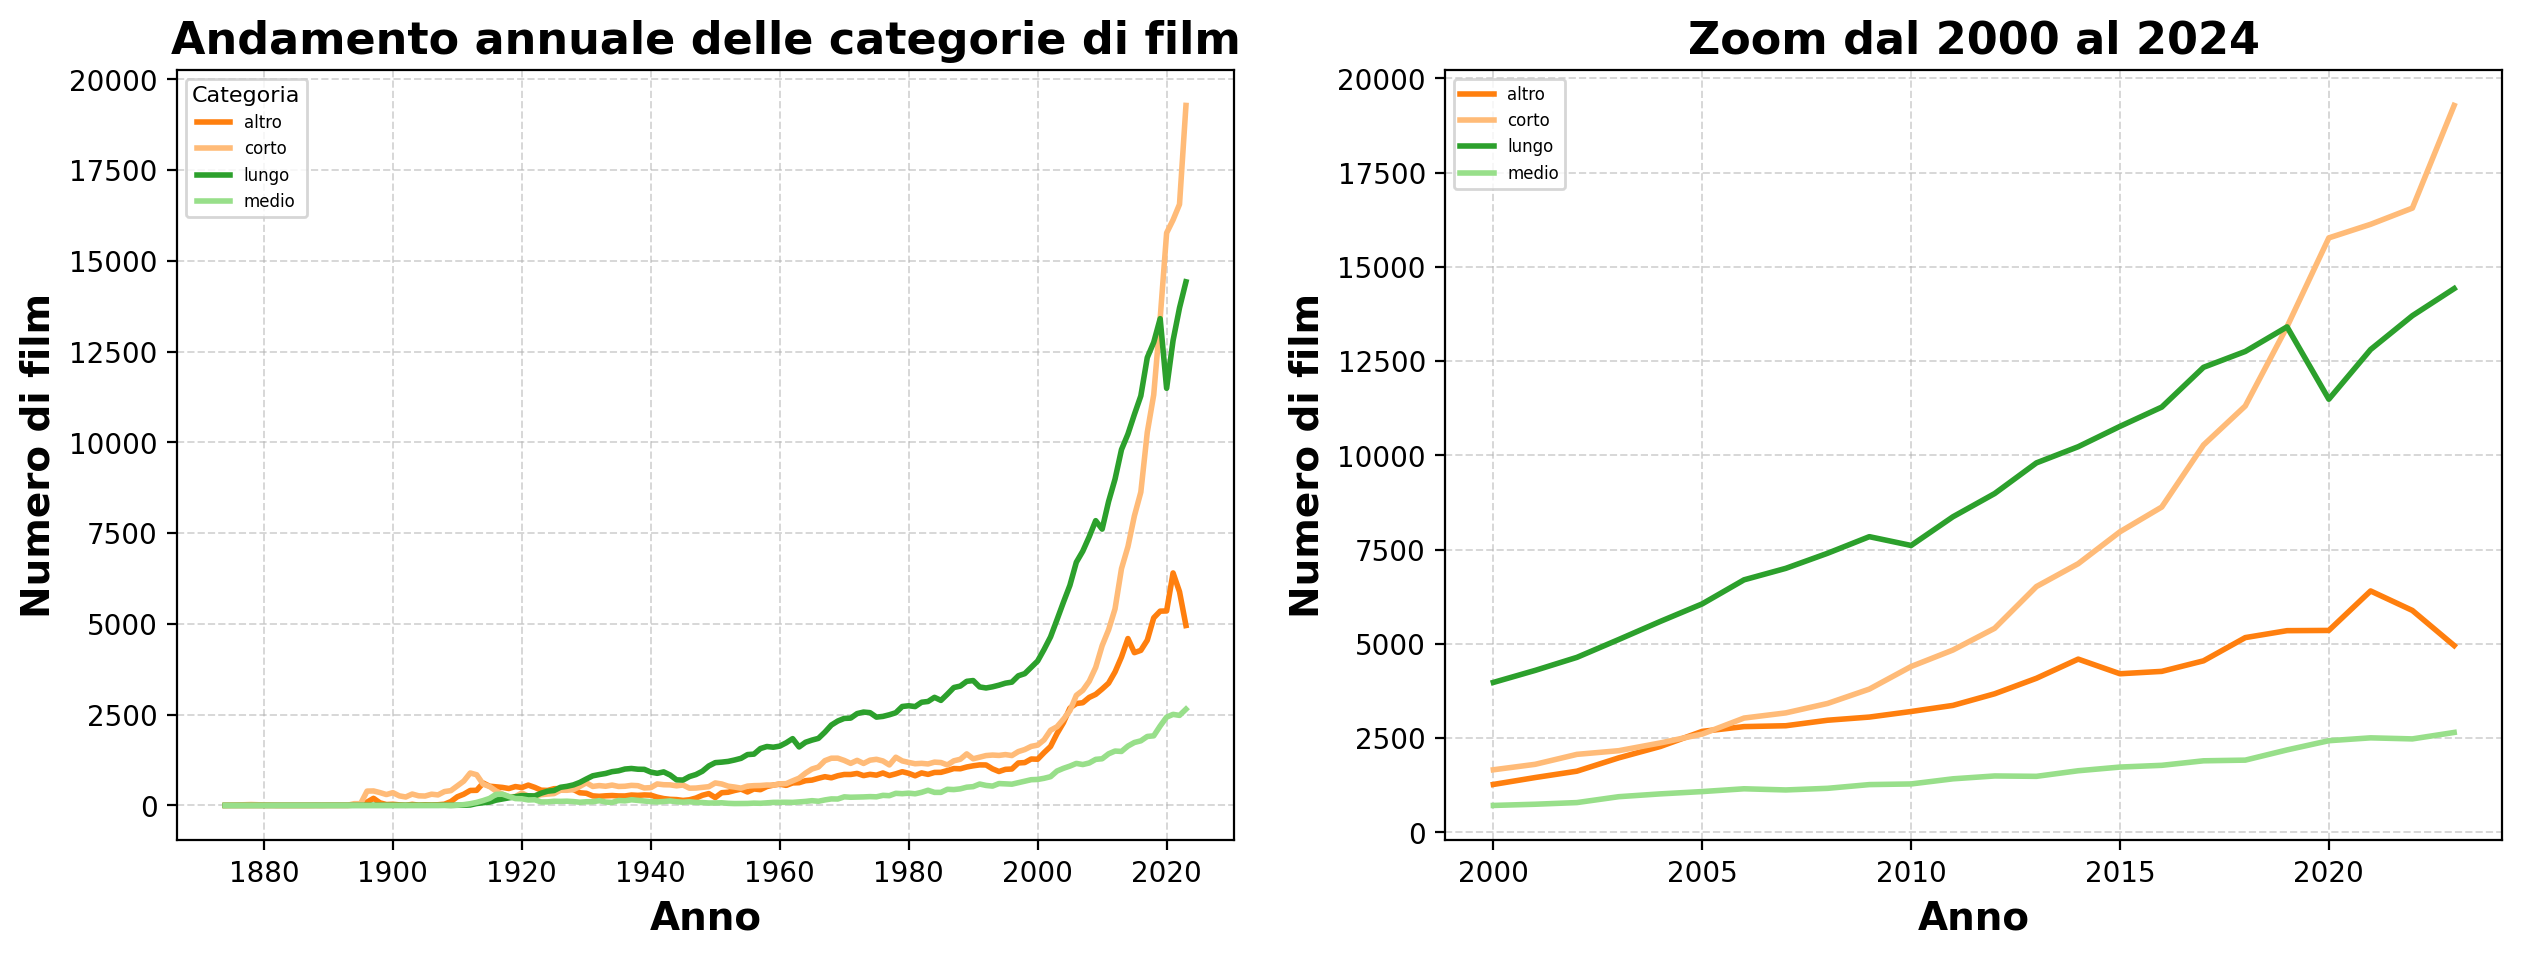

In [174]:
a = df_finale['movies'][df_finale['movies']['movie_year'] < 2024].groupby(['movie_year', 'categoria']).size().reset_index(name='count')

a = a.pivot(index='movie_year', columns='categoria', values='count').fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(15,5))

for i, categoria in enumerate(a.columns):
    ax[0].plot(a.index, a[categoria], label=categoria, color=palette[i+2])

ax[0].set_xlabel('Anno', fontsize=14)
ax[0].set_ylabel('Numero di film', fontsize=14)
ax[0].set_title('Andamento annuale delle categorie di film', fontsize=16)
ax[0].legend(title='Categoria')
ax[0].grid(True)


a_zoom = a.loc[2000:2024]
for i, categoria in enumerate(a_zoom.columns):
    ax[1].plot(a_zoom.index, a_zoom[categoria], label=categoria, color=palette[i+2])

ax[1].set_xlabel('Anno', fontsize=14)
ax[1].set_ylabel('Numero di film', fontsize=14)
ax[1].set_title('Zoom dal 2000 al 2024', fontsize=16)
ax[1].legend()
ax[1].grid(True)

plt.show()

Utilizzando il concetto matematico della derivata, è possibile identificare i tassi di cambiamento nella produzione di film per ogni categoria, permettendo di rilevare punti di svolta significativi nel settore.

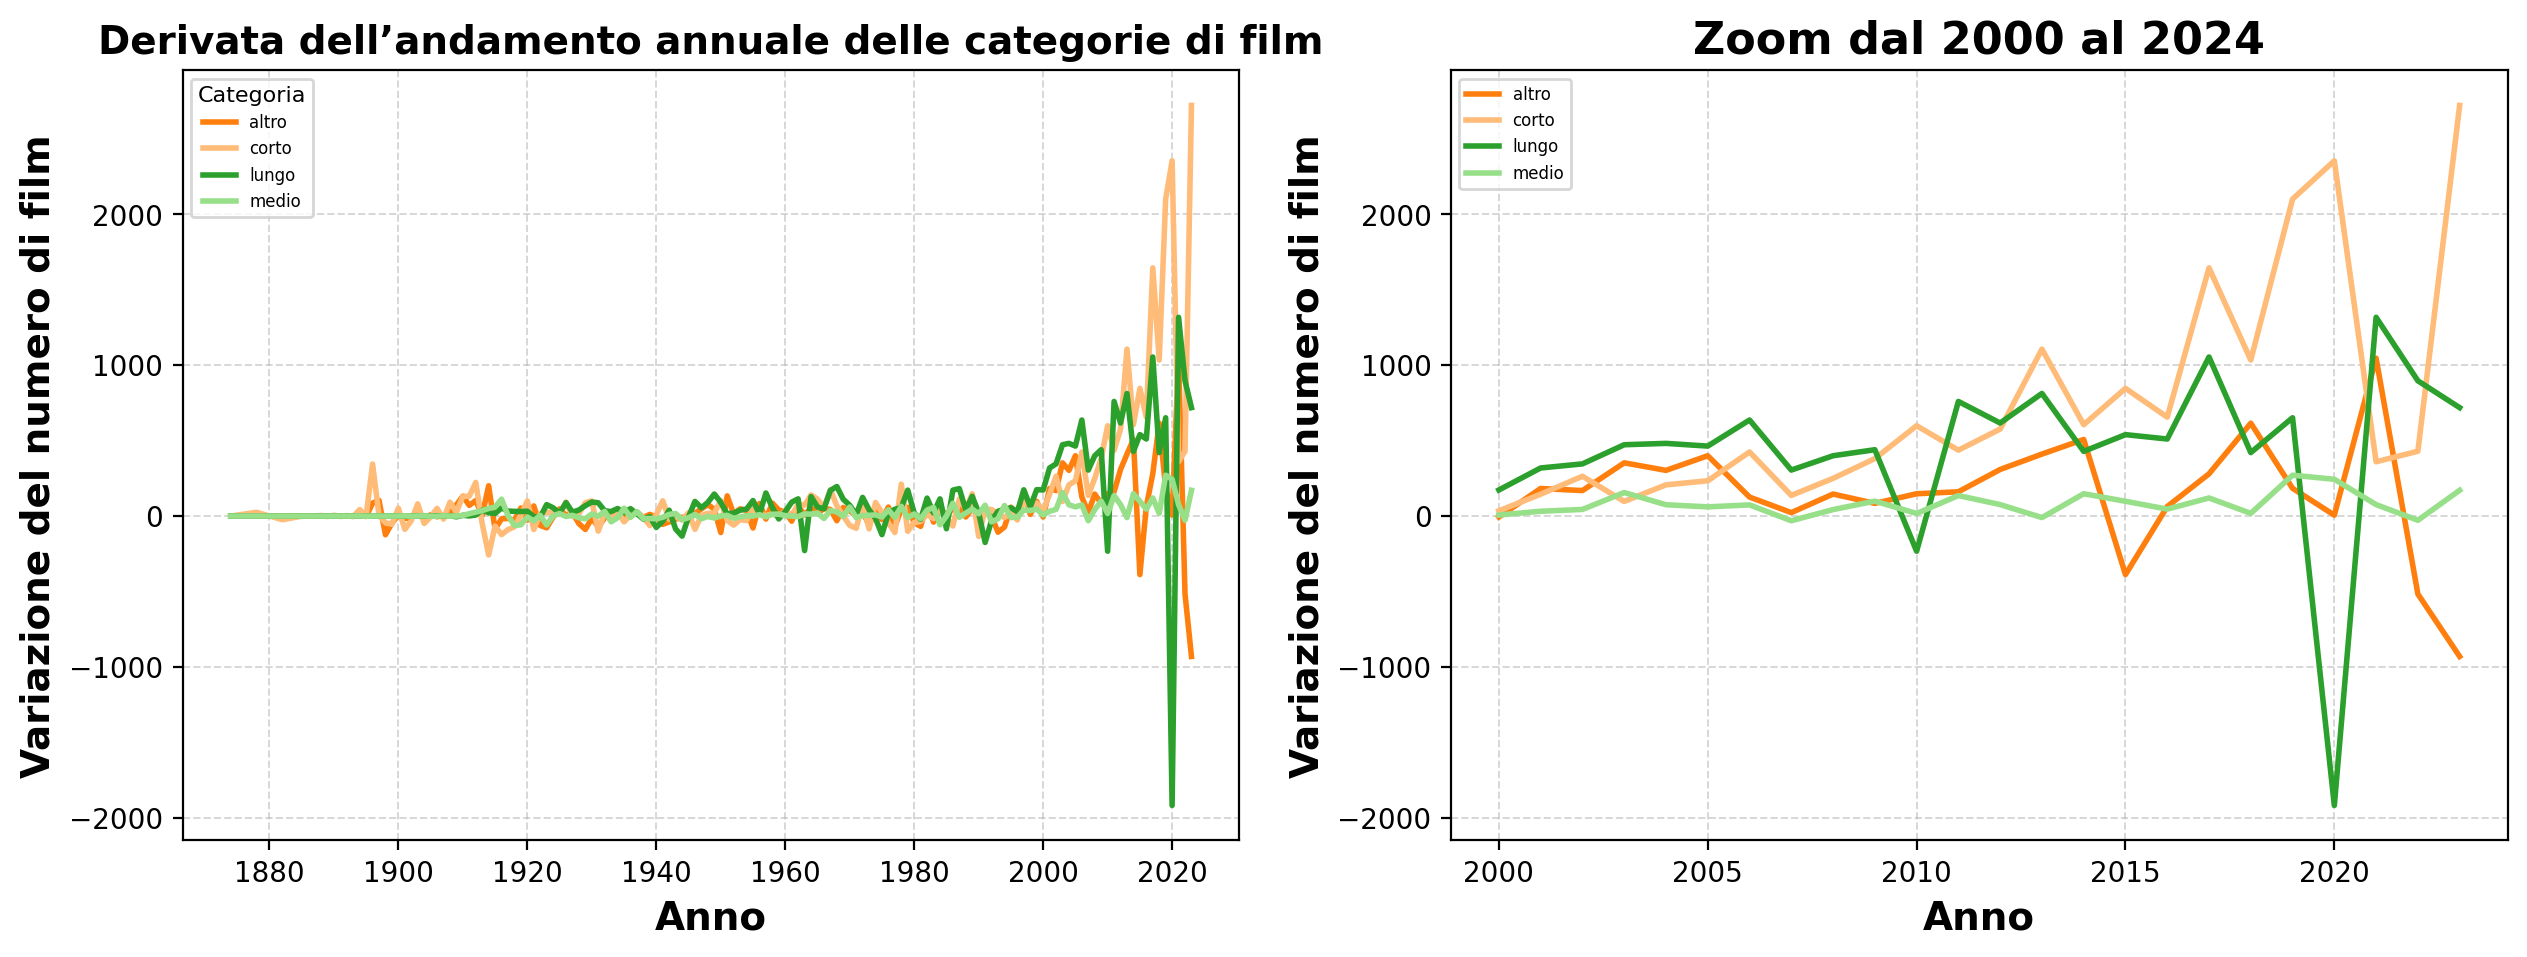

<Figure size 2400x1200 with 0 Axes>

In [176]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

df_derivative = a.diff().fillna(0)  # Differenza rispetto all'anno precedente

plt.figure(figsize=(12, 6))
for i, categoria in enumerate(df_derivative.columns):
    ax[0].plot(df_derivative.index, df_derivative[categoria], label=categoria, color=palette[i+2])

ax[0].set_xlabel('Anno', fontsize=14)
ax[0].set_ylabel('Variazione del numero di film', fontsize=14)
ax[0].set_title('Derivata dell’andamento annuale delle categorie di film', fontsize=14)
ax[0].legend(title='Categoria')
ax[0].grid(True)


derivata_zoom = df_derivative.loc[2000:2024]
for i, categoria in enumerate(derivata_zoom.columns):
    ax[1].plot(derivata_zoom.index, derivata_zoom[categoria], label=categoria, color=palette[i+2])

ax[1].set_xlabel('Anno', fontsize=14)
ax[1].set_ylabel('Variazione del numero di film', fontsize=14)
ax[1].set_title('Zoom dal 2000 al 2024', fontsize=16)
ax[1].legend()
ax[1].grid(True)

plt.show()

Come possiamo vedere, la maggior parte della serie storica, fino a circa il 2000, mostra oscillazioni relativamente contenute per tutte le categorie.

#### Impatto della Pandemia COVID-19
Il 2020 rappresenta un punto di particolare interesse, mostrando un calo drammatico nella produzione, particolarmente evidente nella categoria "*lungo*" (lungometraggi).
La ragione è presumibilmente imputabile alla pandemia di COVID-19, che ha comportato diversi fattori:

- Chiusura delle sale cinematografiche
- Interruzione delle produzioni
- Restrizioni sui set di produzione
- Ridistribuzione degli investimenti verso piattaforme digitali

È interessante notare che le categorie "*corto*" e "*altro*" mostrano una maggiore resilienza durante questo periodo, probabilmente perché questo tipo di contenuti si è adattato meglio alla situazione.

### <span style="color: orange;"> *Case produttrici più prolifiche*

In [76]:
movies_studios = pd.merge(df_finale['movies'], df_finale['studios'], on='id', how='inner')

for k in movies_studios['categoria'].unique():
    sub_movies_studios = movies_studios[movies_studios['categoria'] == k].groupby('studio').size().sort_values(ascending=False)
    print(sub_movies_studios)
    break

studio
Paramount                              2117
Warner Bros. Pictures                  2081
Universal Pictures                     1953
BBC                                    1948
Columbia Pictures                      1928
                                       ... 
오피오티픽쳐스                                   1
영화사 일취월장                                  1
#1NFLUENCE Production                     1
"Yeni Film" Film Company                  1
"Weathering With You" Film Partners       1
Length: 107193, dtype: int64


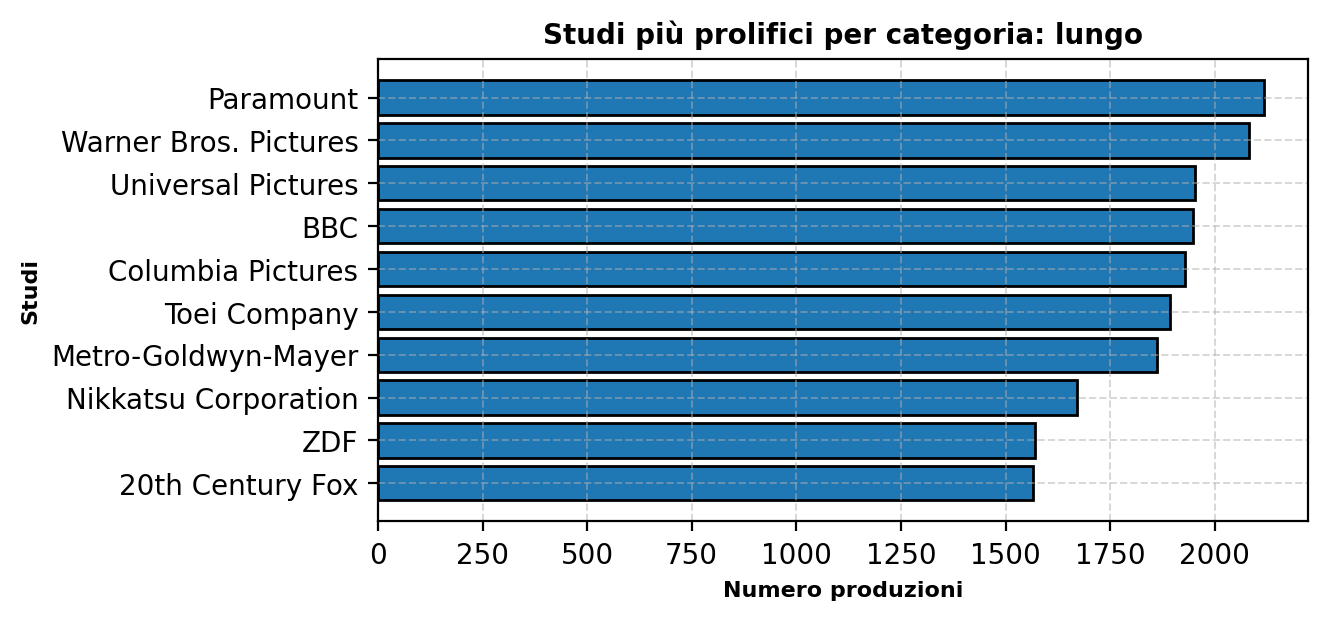

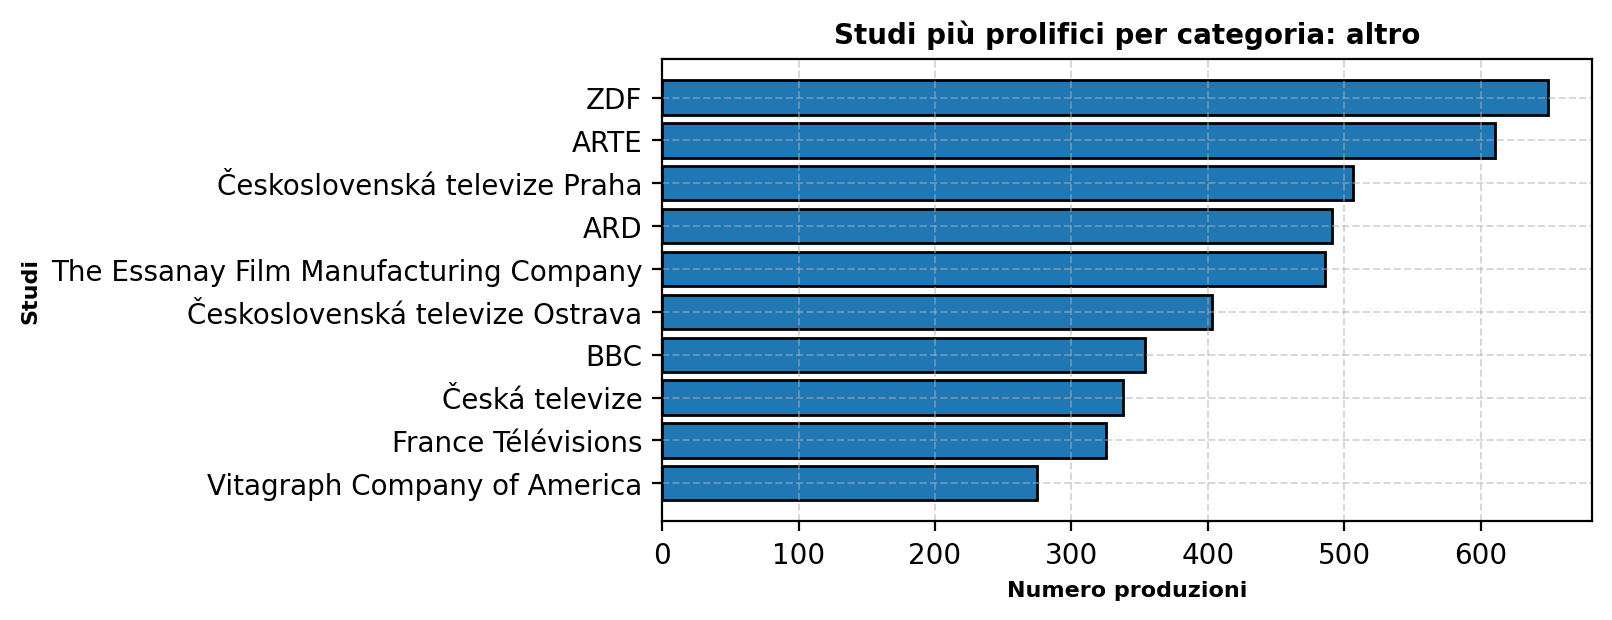

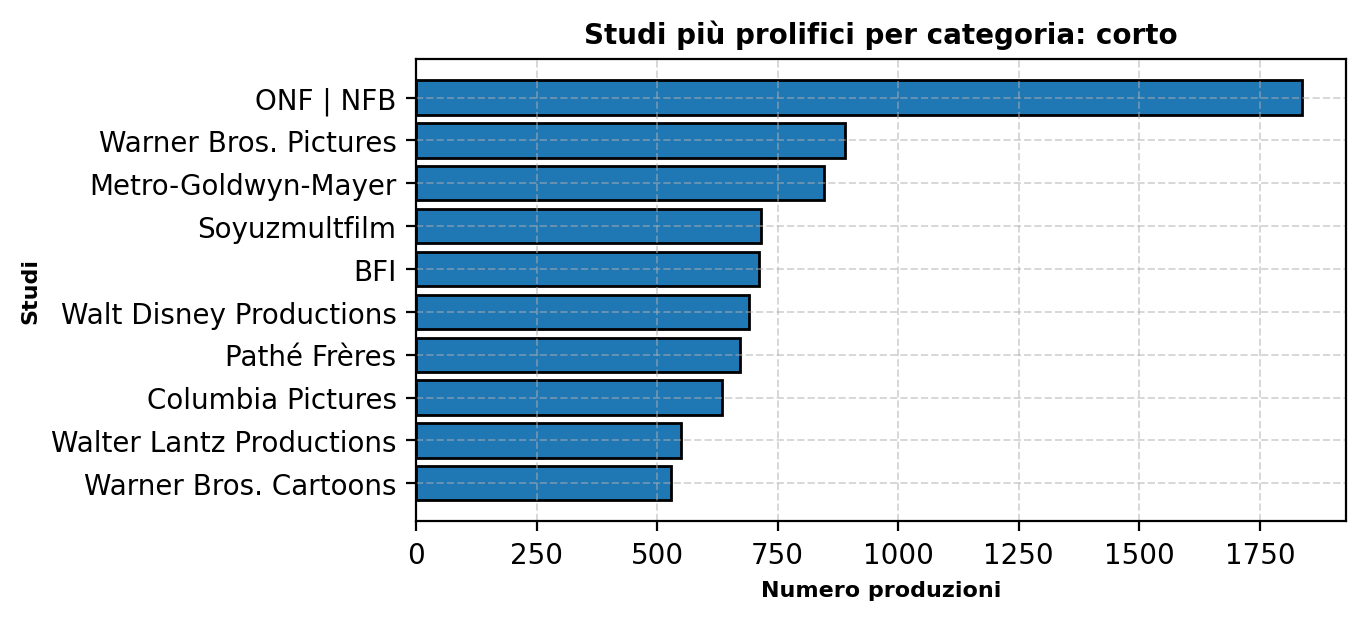

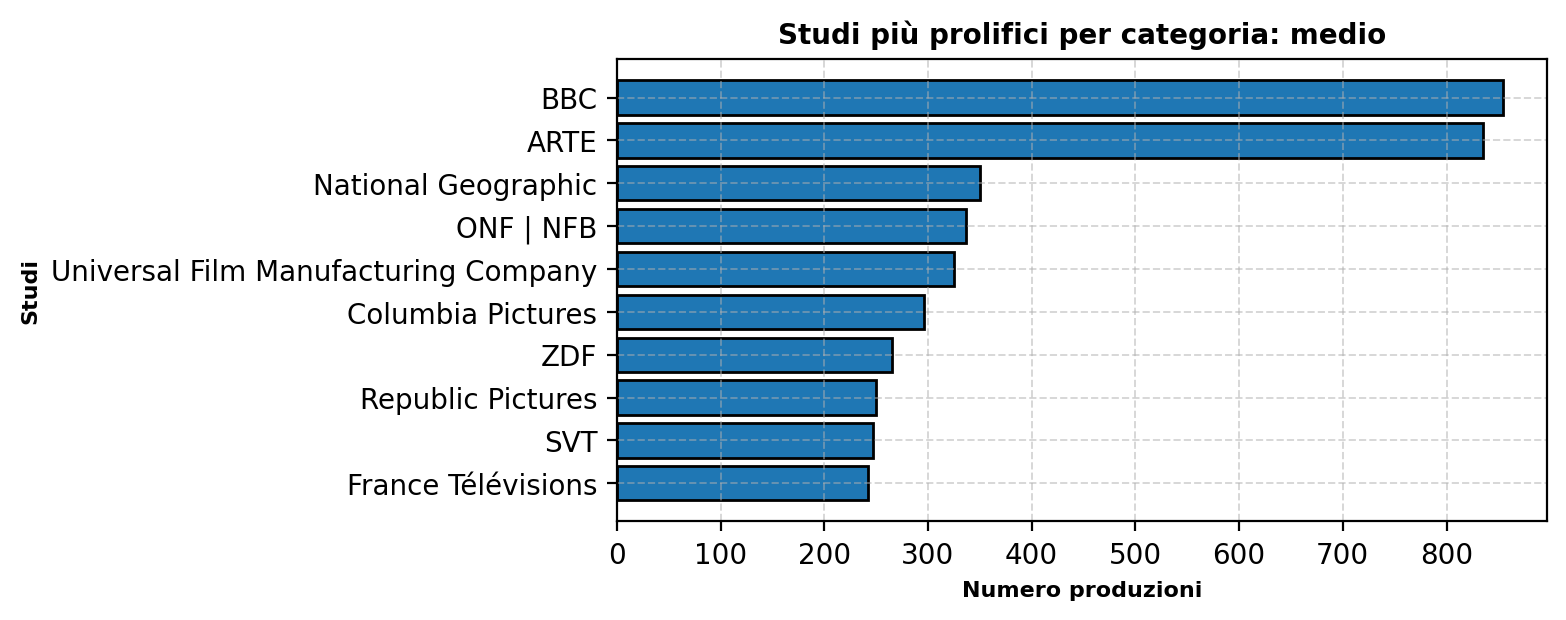

In [ ]:
for k in movies_studios['categoria'].unique():
    sub_movies_studios = movies_studios[movies_studios['categoria'] == k].groupby('studio').size().sort_values(ascending=False)
    plt.barh(sub_movies_studios[:10].index[::-1], sub_movies_studios[:10].values[::-1], color=palette[0], edgecolor='black')
    plt.ylabel("Studi")
    plt.xlabel("Numero produzioni")
    plt.title(f"Studi più prolifici per categoria: {k}")
    plt.show()

I grafici  confermano la supremazia assoluta degli Stati Uniti, seguiti a grande distanza da Francia, Regno Unito e altri paesi europei.

Questo predominio si spiega attraverso:
- **Infrastrutture consolidate**: Hollywood è visto come centro mondiale dell'industria
- **Investimenti massicci**: Capacità finanziaria superiore per produzioni di alto livello
- **Mercato interno**: Un numero di abitanti che garantisce l'ammortizzazione dei costi
- **Distribuzione globale**: Reti distributive capillari a livello mondiale

### <span style="color: orange;">*Analisi degli Oscar*

In [180]:
oscar_movie = pd.merge(df_finale['movies'],df_finale['the_oscar_awards'][~df_finale['the_oscar_awards']['movie_title'].isna()], on=['movie_title','movie_year'], how='inner')
oscar_movie

,id,movie_title,movie_year,tagline,description,minute,movie_rating,categoria,year_ceremony,ceremony,category,member_name,winner
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,lungo,2024,96,ACTOR IN A SUPPORTING ROLE,Ryan Gosling,False
1,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,lungo,2024,96,ACTRESS IN A SUPPORTING ROLE,America Ferrera,False
2,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,lungo,2024,96,COSTUME DESIGN,Jacqueline Durran,False
3,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,lungo,2024,96,MUSIC (Original Song),Music and Lyric by Mark Ronson and Andrew Wyatt,False
4,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,lungo,2024,96,MUSIC (Original Song),Music and Lyric by Billie Eilish and Finneas O...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,1579358,Servant of a Nation,1943.0,NaN,Documentary short that was short-listed for th...,10.0,NaN,corto,1944,16,DOCUMENTARY (Short Subject),Union of South Africa,False
9044,1605911,The Long Goodbye,2021.0,NaN,This is a personal documentary of Election Day...,7.0,NaN,corto,2022,94,SHORT FILM (Live Action),Aneil Karia and Riz Ahmed,True
9045,1626946,Task Force,1943.0,NaN,Technicolor 2-reeler on the US Coast Guard.,10.0,NaN,corto,1944,16,DOCUMENTARY (Short Subject),United States Coast Guard,False
9046,1658419,That's Life,1986.0,NaN,Theo Eshetu uses the manipulation of televisio...,12.0,NaN,corto,1987,59,MUSIC (Original Song),Music by Henry Mancini; Lyric by Leslie Bricusse,False


In [181]:
nomination= oscar_movie.groupby('id').size()
win_losses_totali_film = oscar_movie.groupby('id')['winner'].value_counts().unstack(level=1)
vittorie_totali = win_losses_totali_film[True].fillna(0).astype(int)
oscar_movie['nomination'] = oscar_movie['id'].map(nomination)
oscar_movie['vittorie'] = oscar_movie['id'].map(vittorie_totali)
oscar_movie.drop_duplicates('id').sort_values(by='nomination',ascending=False)

,id,movie_title,movie_year,tagline,description,minute,movie_rating,categoria,year_ceremony,ceremony,category,member_name,winner,nomination,vittorie
325,1000074,Titanic,1997.0,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,194.0,3.81,lungo,1998,70,ACTRESS IN A LEADING ROLE,Kate Winslet,False,14,11
26,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,lungo,2017,89,ACTOR IN A LEADING ROLE,Ryan Gosling,False,14,6
278,1000067,The Lord of the Rings: The Fellowship of the Ring,2001.0,One ring to rule them all,"Young hobbit Frodo Baggins, after inheriting a...",179.0,4.37,lungo,2002,74,ACTOR IN A SUPPORTING ROLE,Ian McKellen,False,13,4
3795,1004576,From Here to Eternity,1953.0,Pouring out of impassioned pages...brawling th...,"In 1941 Hawaii, a private is cruelly punished ...",118.0,3.76,lungo,1954,26,ACTOR,Montgomery Clift,False,13,8
747,1000258,The Shape of Water,2017.0,A Fairy Tale for Troubled Times,"An other-worldly story, set against the backdr...",123.0,3.67,lungo,2018,90,ACTOR IN A SUPPORTING ROLE,Richard Jenkins,False,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,1140821,D-Day Remembered,1994.0,NaN,An award-winning documentary of the invasion o...,54.0,NaN,medio,1995,67,DOCUMENTARY (Feature),Charles Guggenheim,False,1,0
9012,1135405,Saint Matthew Passion,1966.0,NaN,Oscar nominated documentary short from Hungary...,40.0,NaN,medio,1967,39,DOCUMENTARY (Short Subject),Mafilm Studio,False,1,0
9011,1134664,Breaking the Language Barrier,1961.0,NaN,The Air Force Thunderbirds present air shows f...,14.0,NaN,corto,1962,34,DOCUMENTARY (Short Subject),United States Air Force,False,1,0
9010,1134501,To Live Again,1963.0,NaN,To Live Again is a 1963 short documentary film...,20.0,NaN,corto,1964,36,DOCUMENTARY (Short Subject),"Mel London, Producer",False,1,0


I film con il maggior numero di nomination (Titanic con 14, Il Signore degli Anelli, La La Land) mostrano come l'Academy premi produzioni che combinano il successo commerciale, l'nnovazione tecnica e un tipo di narrazione universale.

---

Analizziamo la correlazione tra il numero di vittorie di un film e le caratteristiche del suddetto:

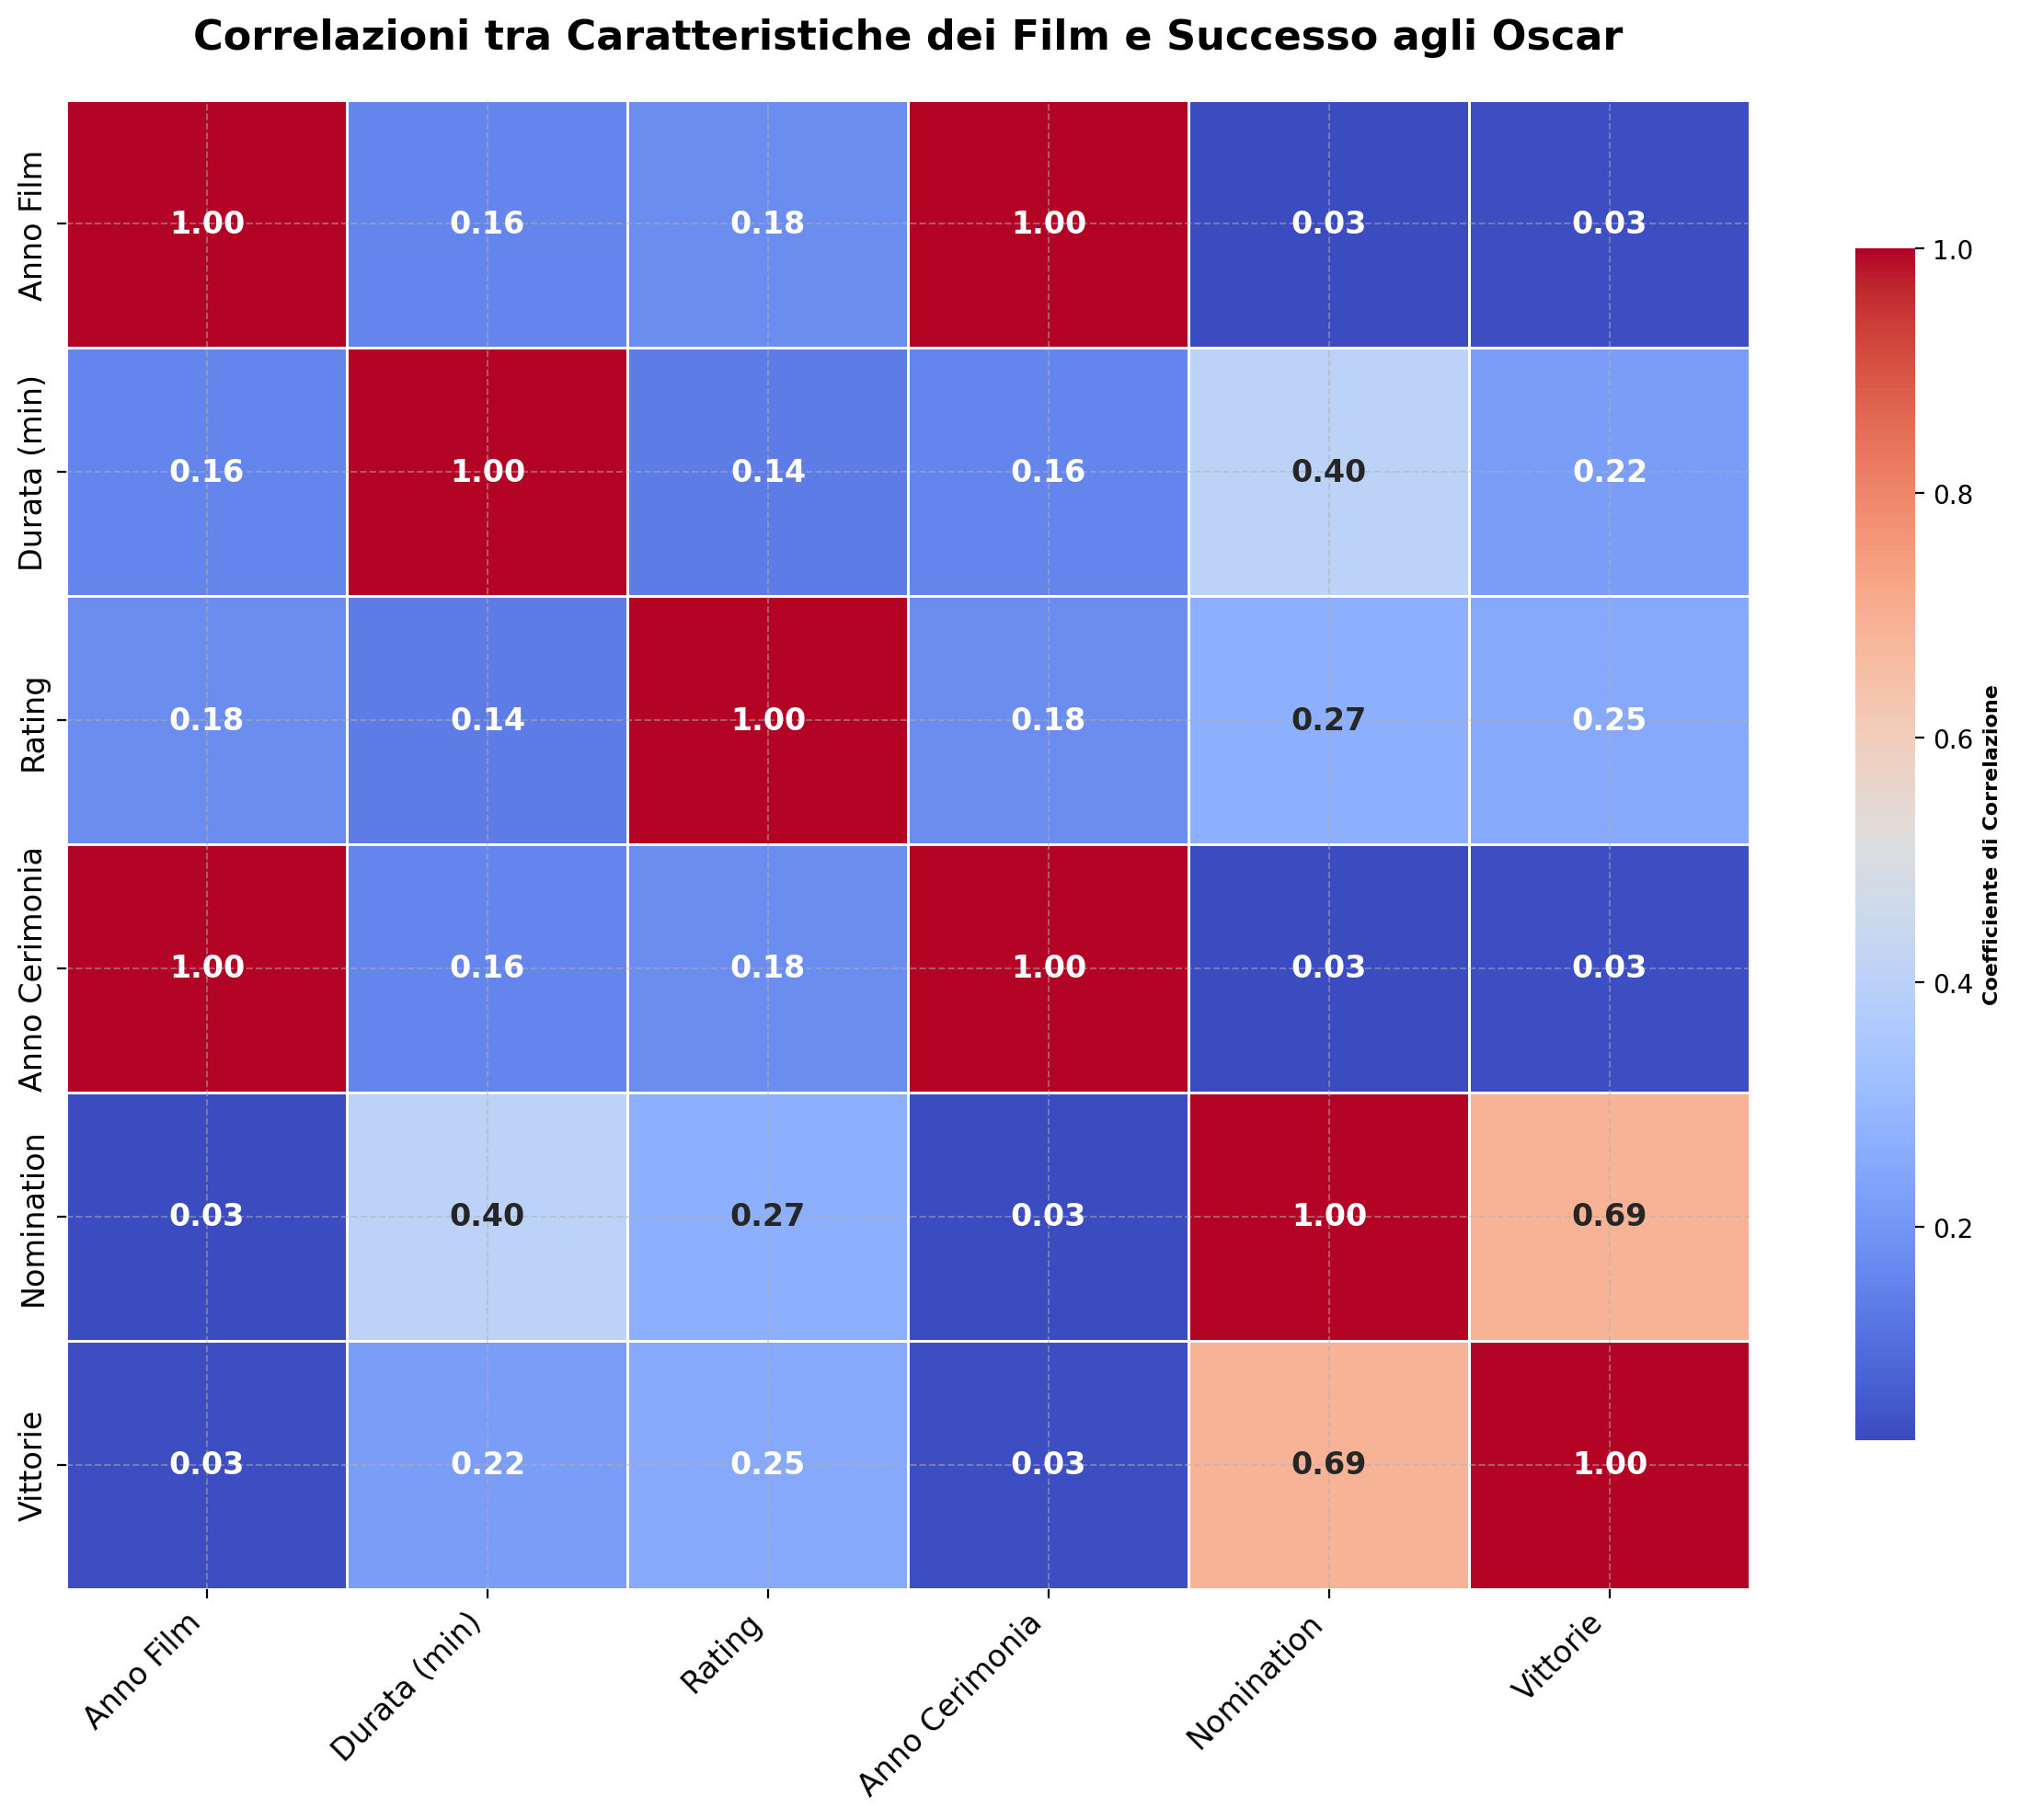

In [182]:
unique_movies = oscar_movie.drop_duplicates(subset='id')
numerical_columns = unique_movies[['movie_year', 'minute', 'movie_rating', 'year_ceremony', 'nomination','vittorie']]
correlations = numerical_columns.corr()

correlations_renamed = correlations.copy()
correlations_renamed.columns = ['Anno Film', 'Durata (min)', 'Rating', 'Anno Cerimonia', 'Nomination', 'Vittorie']
correlations_renamed.index = ['Anno Film', 'Durata (min)', 'Rating', 'Anno Cerimonia', 'Nomination', 'Vittorie']

plt.figure(figsize=(12, 10))
sns.heatmap(correlations_renamed, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, cbar_kws={'shrink': 0.8, 'label': 'Coefficiente di Correlazione'},
            annot_kws={'size': 12, 'weight': 'bold'})
plt.title('Correlazioni tra Caratteristiche dei Film e Successo agli Oscar', 
          fontweight='bold', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Ricordiamo che i valori di correlazione vanno da -1 a +1. Valori vicini a +1 indicano una relazione positiva forte (quando una variabile cresce, anche l'altra tende a crescere), mentre valori vicini a 0 indicano assenza di relazione lineare.

La correlazione più significativa che emerge è quella tra Nomination e Vittorie (0.69). Questo valore ci dice qualcosa di fondamentale sul funzionamento degli Oscar: più un film riceve nomination, maggiori sono le sue possibilità di vincere premi. Tuttavia, il fatto che la correlazione non sia perfetta (non è 1.00) indica che esistono altri fattori in gioco oltre al semplice numero di nomination.

Un risultato sorprendente è la correlazione tra Durata e Nomination (0.40). Questo pattern ci rivela un bias nel sistema degli Oscar: i film più lunghi tendono a ricevere più nomination. Questo fenomeno può essere interpretato in diversi modi, tra cui forse una percezione di "serietà artistica" e "complessità narrativa".

Un altro risultato interessante da analizzare è la correlazione sorprendentemente bassa tra Rating e il successo agli Oscar (0.27 con Nomination, 0.25 con Vittorie): questo rivela una disconnessione tra la qualità percepita dal pubblico e il riconoscimento accademico.

Vediamo invece correlazioni quasi nulle tra anno di produzione e successo (0.03).


Aggiungiamo adesso anche i generi all'analisi.

In [187]:
oscar_movie_genre = pd.merge(oscar_movie,df_finale['genres'],on='id',how='inner')

In [186]:
top_movies_nomination= oscar_movie_genre.copy()

top_movies_nomination = top_movies_nomination.drop(columns=['category','member_name','winner']).drop_duplicates().sort_values(by='vittorie', ascending=False).iloc[:70]
top_movies_nomination_dummies = top_movies_nomination.assign(**pd.get_dummies(top_movies_nomination['genre'])).drop(columns=['genre'])

top_movies_nomination_dummies = top_movies_nomination_dummies.groupby(['id', 'movie_title', 'movie_year', 'tagline', 'description', 
                               'minute', 'movie_rating', 'year_ceremony', 'ceremony', 
                               'nomination', 'vittorie'], as_index=False).max().sort_values(by='vittorie', ascending=False).drop(columns=['movie_year', 'tagline', 'description', 
                               'minute', 'movie_rating', 'year_ceremony', 'ceremony'])

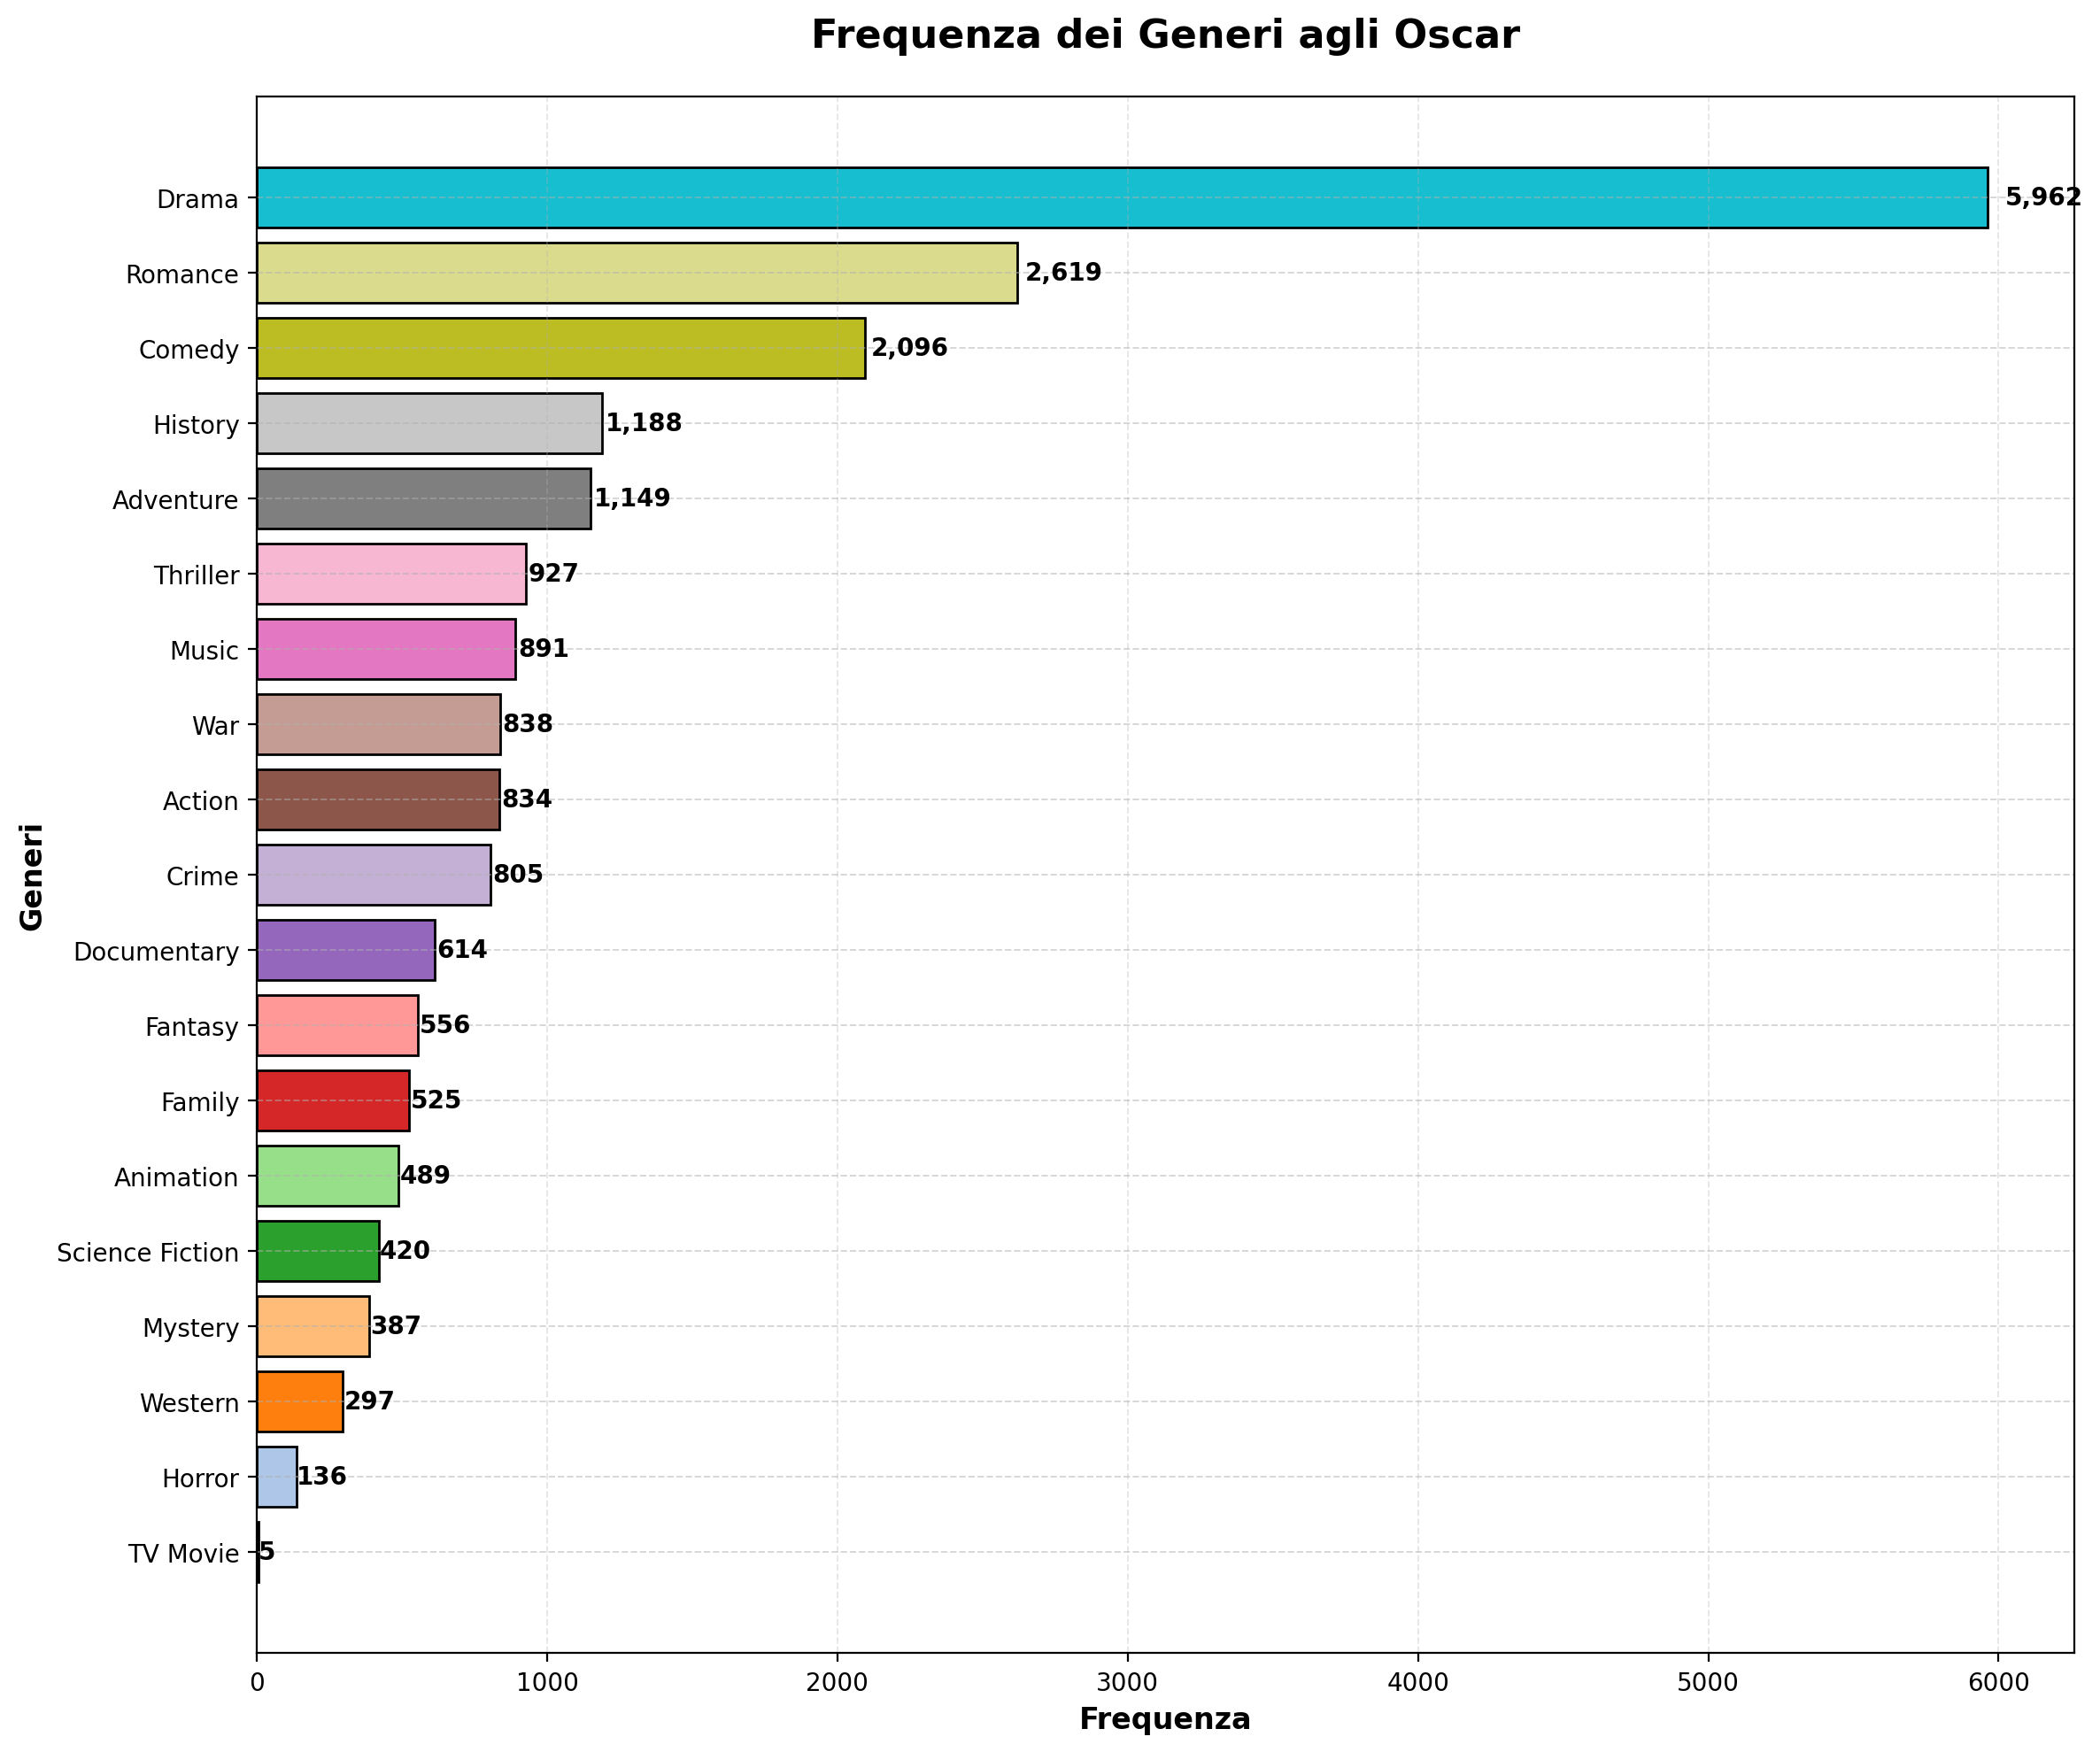

In [185]:
genre_freq= oscar_movie_genre.groupby('genre').size().sort_values()
plt.figure(figsize=(12, 10))
bars = plt.barh(genre_freq.index, genre_freq.values, 
                edgecolor='black', color=palette[:len(genre_freq)], linewidth=1)

# Aggiungere i valori sulle barre
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', ha='left', va='center', fontweight='bold')

plt.xlabel("Frequenza", fontweight='bold', fontsize=12)
plt.ylabel("Generi", fontweight='bold', fontsize=12)
plt.title("Frequenza dei Generi agli Oscar", fontweight='bold', fontsize=16, pad=20)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

I dati rivelano una gerarchia di prestigio ben definita nell'universo Oscar: il drama domina completamente con quasi 6.000 occorrenze, seguito da romance (2.619) e comedy (2.096). 

Il drama onsiderato il genere più "nobile", quello che dimostra le capacità artistiche di registi, attori e sceneggiatori, trattando tematiche universali e spesso attraverso conflitti umani profondi.

Anche questo pattern riflette la preferenza dell'Academy per contenuti seri e impegnati con narrazioni che affrontano temi sociali profondi.

## <span style="color: orange;"> *Produzione film per Stato*

In [188]:
geo_movie=pd.merge(df_finale['movies'],df_finale['countries'],on='id',how='inner')

In [189]:
# Conta i film per paese  
film_per_paese = geo_movie["country"].value_counts().reset_index()
film_per_paese.columns = ["country", "num_films"]

film_per_paese["num_films"] = np.log(film_per_paese["num_films"])  

fig = px.choropleth(
    film_per_paese,
    locations="country",
    locationmode="country names",
    color="num_films",
    title="Numero di Film Prodotti per Paese",
    color_continuous_scale="Oranges", 
    range_color=(film_per_paese["num_films"].min(), film_per_paese["num_films"].max()),  # Normalizzazione
    projection="natural earth",
)


fig.update_layout(
    geo=dict(
        showcoastlines=True,
        showland=True,
        landcolor="white",
        showocean=True,
        oceancolor="lightblue",
        showcountries=True,
        countrycolor="black",
    ),

    coloraxis=dict(
        colorbar=dict(
            title="Film Prodotti",  
            tickvals=np.log1p([1, 10, 100, 1000, 10000, 100000, 1000000]),  # Tick in scala logaritmica
            ticktext=["1", "10", "100", "1K", "10K", "100K", "1M"], 
        ),
        colorscale="Oranges",
        cmin=film_per_paese["num_films"].min(),  # Minimo valore log trasformato
        cmax=film_per_paese["num_films"].max(),  # Massimo valore log trasformato
        colorbar_tickmode="array",
    ),
    margin={"r": 0, "t": 40, "l": 0, "b": 0} 
)
film_per_paese['num_films'] = np.exp(film_per_paese['num_films'])
fig.show()

C:\Users\deros\AppData\Local\Temp\ipykernel_9684\1800016410.py:7: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



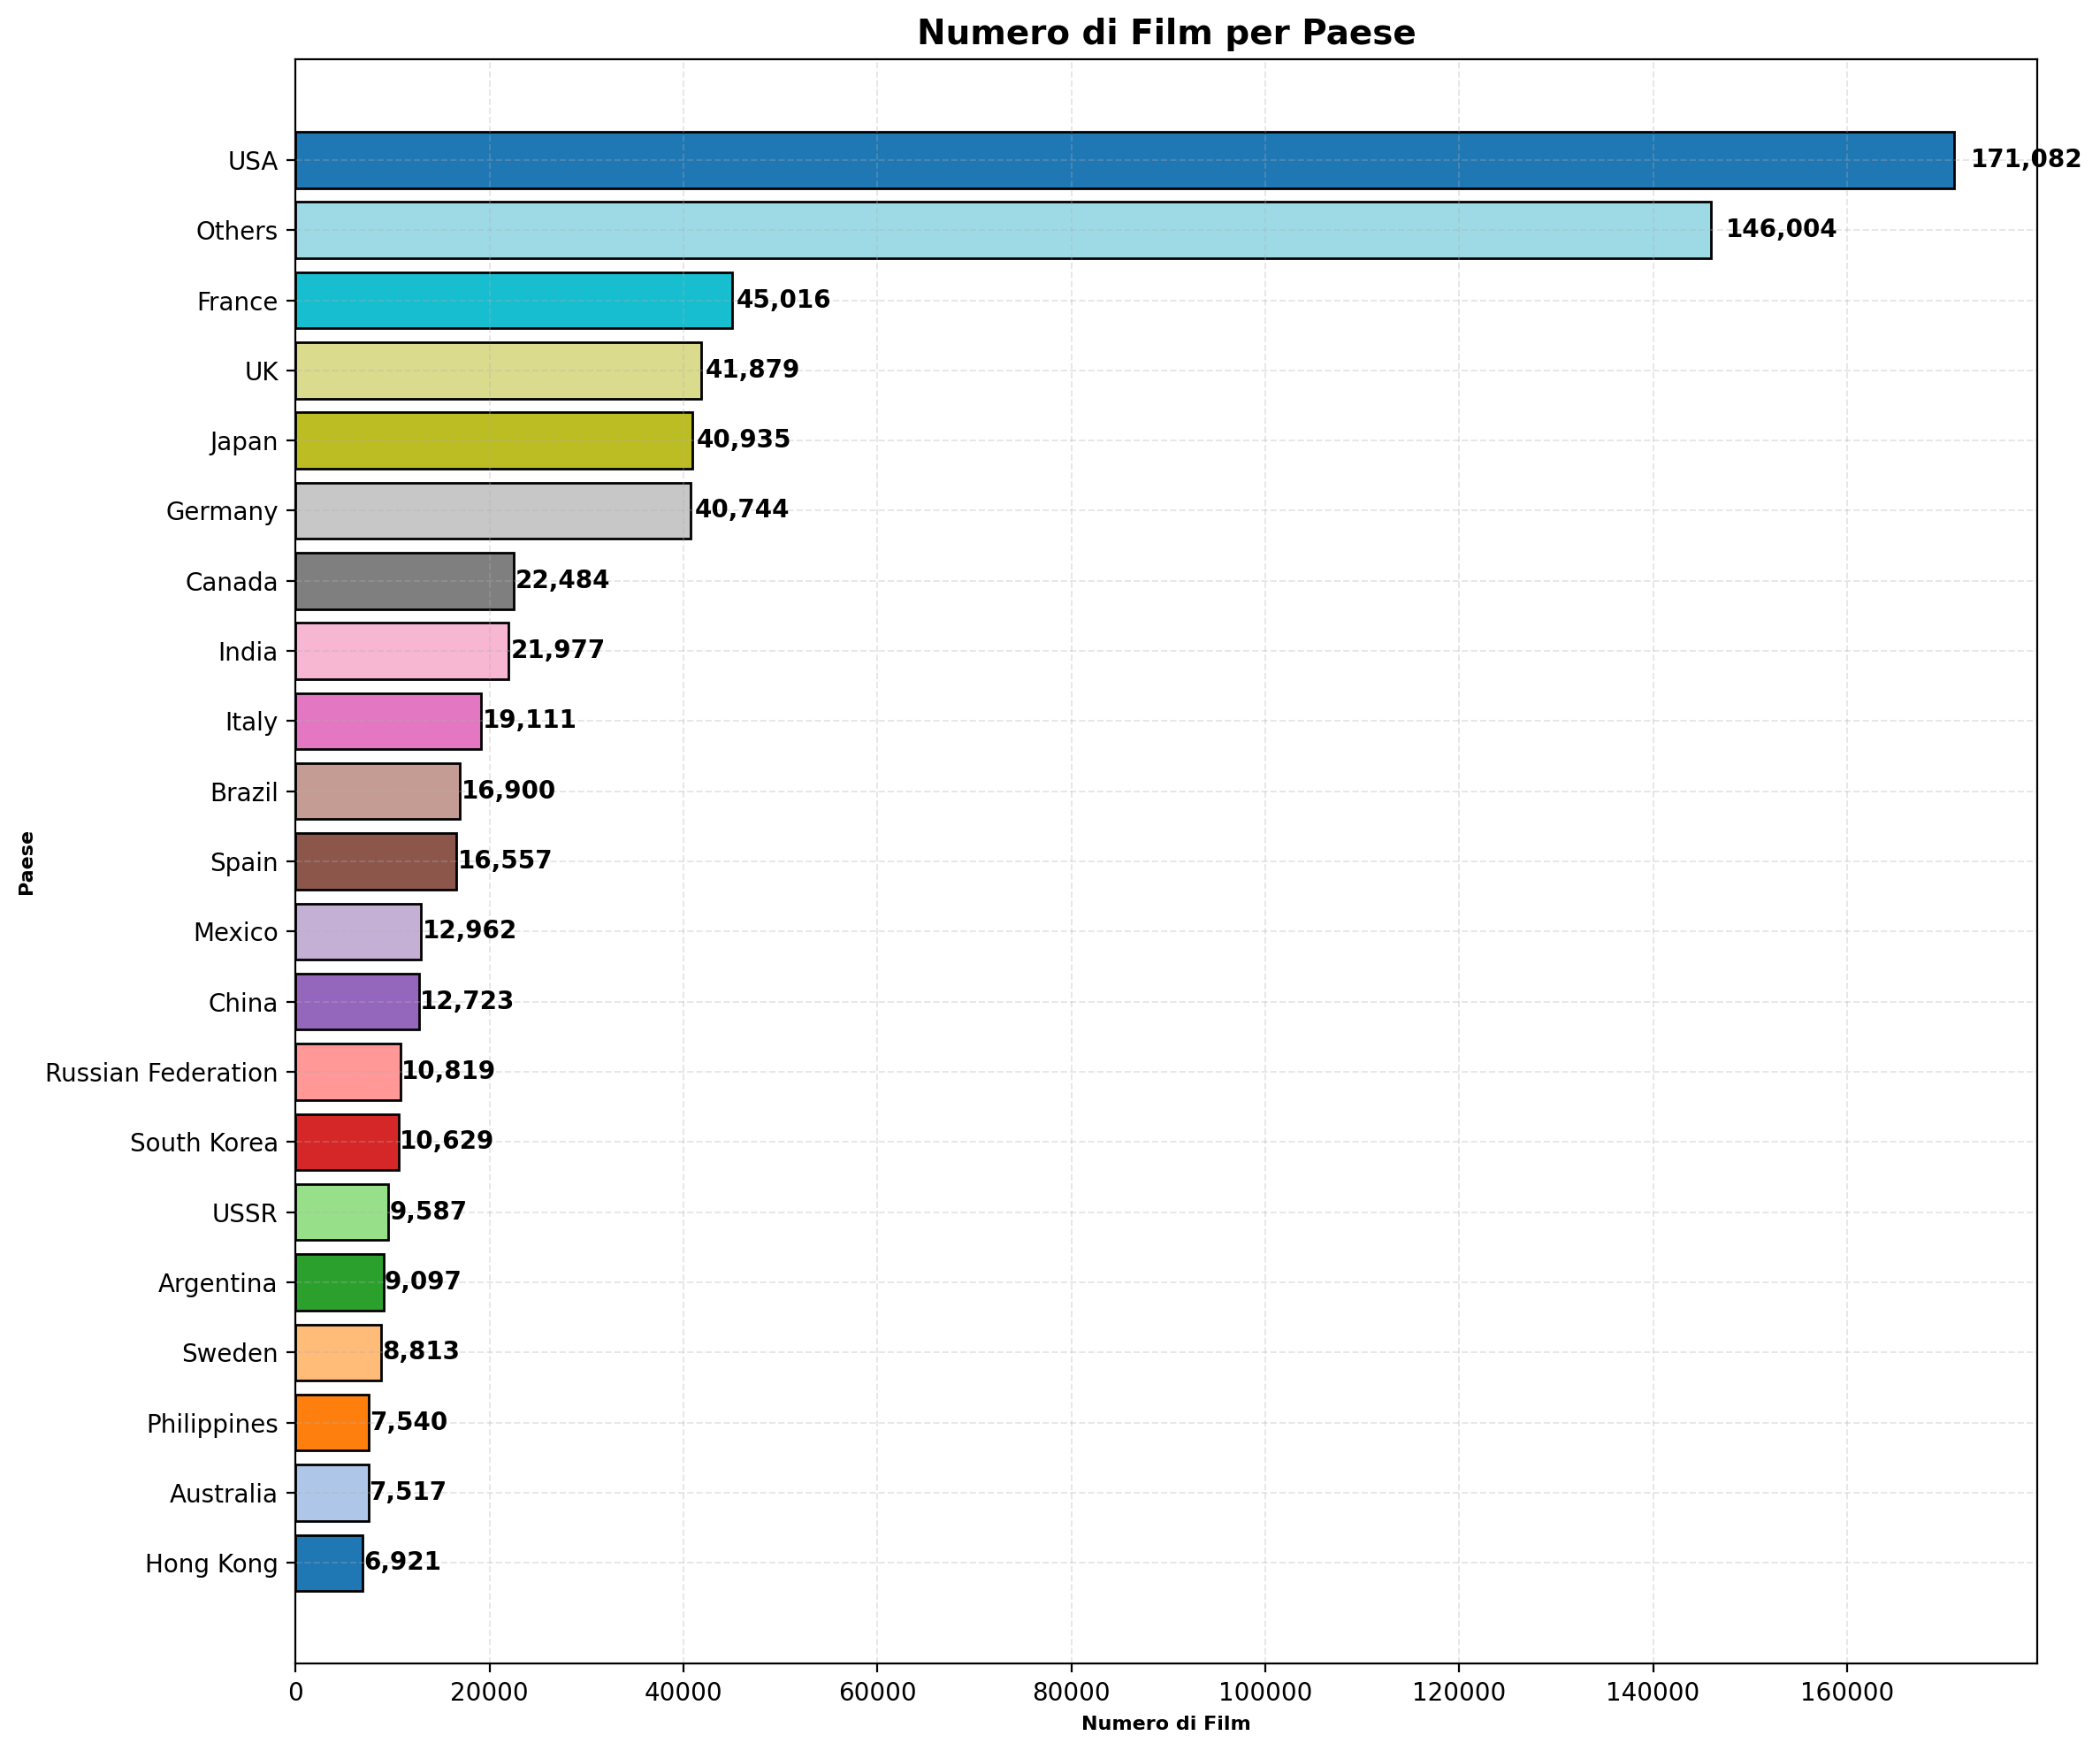

In [ ]:
film_per_paese['country_20'] = None
film_per_paese.loc[0:19, 'country_20'] = film_per_paese.loc[0:19, 'country']
film_per_paese.loc[20:, 'country_20'] = 'Others'

film_per_paese_group = film_per_paese.groupby('country_20')['num_films'].sum()
film_per_paese_group = film_per_paese_group.sort_values()

colors = sns.color_palette("tab20", len(film_per_paese_group))
plt.figure(figsize=(12, 10))
bars = plt.barh(film_per_paese_group.index, film_per_paese_group.values, 
                edgecolor='black', linewidth=1, color=colors)

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', ha='left', va='center', fontweight='bold')

plt.xlabel('Numero di Film')
plt.ylabel('Paese')
plt.title('Numero di Film per Paese', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()